
# Information Below provided from Kaggle: 
#### [Kaggle Dataset and Information Here](https://www.kaggle.com/datasets/jaysobel/kansas-city-barbeque-society-competition-results)
# About Dataset
## Summary
### Access
This data set is also available as a public data set on Mode Analytics as raindata.table_name. Mode provides a PostgreSQL interface for querying and dashboard creation.

### Kansas City Barbeque Society
The Kansas City Barbeque Society hosts competitive BBQ events in the US and around the world. The KCBS trains and certifies barbeque judges to provide rigorous scoring at their contests. Millions of dollars in prizes are awarded annually to top teams.

This data set represents all of the competition results posted on the KCBS Events pages up to November of 2018.

### Data Overview
This dataset includes four tables: competitions, teams, results and competition web pages.

### Competitions
Each row is a KCBS competition with some dimensional data like the prize value, date and location

### Results
Each row is a team's score and place rank within a category at a competition. The category 'overall' reflects their overall score and place rank at the competition.

### Teams
Each row is a team uniquely identified by their lower-cased name string (name_key). Dimensional data is not broadly available for teams on the KCBS website but some can be derived from competition+result data (ie a guess at the team's 'home state').

### Competition Web Pages
Further competition meta-data from the KCBS events pages including the URL and year/month/country slugs of the containing search page.

## Competition Domain Knowledge
### Competition Format
A standard KCBS competition consists of four rounds/categories: chicken, pork ribs, pork, and brisket. Judges are divided into tables with six judges at each table. Efforts are made to evenly distribute judges based on their level of experience (competitions judged).

Judging proceeds with one round for each category. In a standard competition the rounds are ordered: chicken, pork ribs, pork and brisket. Within a round, each table of judges receives entries from six teams. Efforts are made to have each team judged by a different table of judges in each category. Judging is blind.

Non-standard competitions may include additional categories or exclude main categories and may not calculate the overall score as a combination of the four main categories.

### Scoring System
An entry is scored on three dimensions: appearance, taste and texture. Nine is 'excellent', eight is 'very good', seven is 'above average', six is 'average', five is 'below-average' and the list goes on. A one is a penalty, and can only be given after consulting a KCBS representative.

Judges are inclined to avoid scoring below a six unless there was an obvious problem with an entry. Teams spend substantial sums on supplies and judges, while volunteers, are eating for free. Judges are encouraged to fill out comment cards for flawed entries.

A team's final score in a single category is calculated by a sum of weighted judge scores with the lowest score thrown away. A team's overall score is (typically) the sum of their four category scores. Unweighted judge scores can be used to break ties, and if there is still a tie, the lowest score is brought back into the equation.


## Scoring Breakdown
### Score Range:
* Appearance: 0 : 9
* Taste: 0 : 9
* Tenderness: 0 : 9

        Score Weighting

        (appearance × .56) + (taste × 2.2972) + (tenderness × 1.1428)

        Maximum Single Judge Score:

        (9 × .56) + (9 × 2.2972) + (9 × 1.1428) = 36

        Maximum Category Score:

        (6 - 1) judges × 36 points = 180
        
        Maximum Standard Overall Score:

        4 categories × 180 points = 720

# All Data is from 2007-2018 KCBS competitions.

## Personal Background 

> Growing up my dad did the American Royal a KCBS competition in my hometown. I always loved watching him and others cook some of the best BBQ in the United States at one of the biggest competitions. I was always curious about the geographic and statistical underlying of the competition and this project helped me to understand the competition and learn more about python and its associated data science libraries.

In [32]:
# Imports of all the necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

#Source of Data: https://www.kaggle.com/datasets/jaysobel/kansas-city-barbeque-society-competition-results?resource=download&select=results.csv

In [33]:
dfCompWP = pd.read_csv('competition_web_pages.csv')
dfCompWP.head()

,id,kcbs_competition_id,url,year,month,country,created_at,updated_at
0,1,614,https://www.kcbs.us/event/614/gator-hammock-wi...,2007,1,1,2018-11-17 22:27:42,2018-11-17 22:27:42
1,2,715,https://www.kcbs.us/event/715/lakeland-pig-fes...,2007,1,1,2018-11-17 22:27:42,2018-11-17 22:27:42
2,3,717,https://www.kcbs.us/event/717/mitchell-co-bbq-...,2007,3,1,2018-11-17 22:27:43,2018-11-17 22:27:43
3,4,621,https://www.kcbs.us/event/621/north-kansas-cit...,2007,3,1,2018-11-17 22:27:43,2018-11-17 22:27:43
4,5,714,https://www.kcbs.us/event/714/new-mexico-pork-...,2007,3,1,2018-11-17 22:27:43,2018-11-17 22:27:43


In [34]:
dfTeams = pd.read_csv('teams.csv')
dfTeams.head()

,id,name,name_key,created_at,updated_at
0,1,HOG TIDE BAR-B-QUE,hog tide bar-b-que,2018-11-17 23:14:36,2018-11-17 23:14:36
1,2,SWIGGIN PIG,swiggin pig,2018-11-17 23:14:36,2018-11-17 23:14:36
2,3,BIG B'S BBQ - TN,big b's bbq - tn,2018-11-17 23:14:36,2018-11-17 23:14:36
3,4,SMOKIN T'S,smokin t's,2018-11-17 23:14:36,2018-11-17 23:14:36
4,5,SMOKE ME SILLY,smoke me silly,2018-11-17 23:14:36,2018-11-17 23:14:36


In [35]:
dfResults = pd.read_csv('results.csv')
dfResults.head()

,id,team_id,competition_id,place_rank,category,score,created_at,updated_at
0,1,1,1867,1,overall,690.2858,2018-11-17 23:14:36,2018-11-17 23:14:36
1,2,2,1867,2,overall,687.4282,2018-11-17 23:14:36,2018-11-17 23:14:36
2,3,3,1867,3,overall,682.2854,2018-11-17 23:14:36,2018-11-17 23:14:36
3,4,4,1867,4,overall,682.2852,2018-11-17 23:14:36,2018-11-17 23:14:36
4,5,5,1867,5,overall,679.9996,2018-11-17 23:14:36,2018-11-17 23:14:36


In [36]:
dfComp = pd.read_csv('competitions.csv')
dfComp.head()

,id,kcbs_competition_id,name,location,state,start_date,is_state_championship,prize_amount,percent_judges_certified,created_at,updated_at
0,1,614,Gator Hammock Wild Pig & Pepper Jam,"Felda, FL",FL,2007-01-01,True,NaN,NaN,2018-11-17 23:04:25,2018-11-17 23:04:25
1,2,621,North Kansas City BBQ,"North Kansas City, MO",MO,2007-03-09,True,NaN,NaN,2018-11-17 23:04:25,2018-11-17 23:04:25
2,3,624,Smokin Red Dirt Cookoff,"Enid, OK",OK,2007-04-13,True,NaN,NaN,2018-11-17 23:04:25,2018-11-17 23:04:25
3,4,625,Smoke in the Spring,"Osage City, KS",KS,2007-04-13,True,NaN,NaN,2018-11-17 23:04:26,2018-11-17 23:04:26
4,5,626,BBQ'n at the Autry,"Los Angeles, CA",CA,2007-04-13,True,NaN,NaN,2018-11-17 23:04:26,2018-11-17 23:04:26


## KC BBQ Heatmap

> This takes all of the information based on state frequency and generates a heatmap that shows number of KCBS competitions states with associated color scale.

In [ ]:
# Dictionary of all state abbreviations with placeholder 0 for number of BBQ competitions
states = {
    'AK': 0,
    'AL': 0,
    'AR': 0,
    'AZ': 0,
    'CA': 0,
    'CO': 0,
    'CT': 0,
    'DC': 0,
    'DE': 0,
    'FL': 0,
    'GA': 0,
    'HI': 0,
    'IA': 0,
    'ID': 0,
    'IL': 0,
    'IN': 0,
    'KS': 0,
    'KY': 0,
    'LA': 0,
    'MA': 0,
    'MD': 0,
    'ME': 0,
    'MI': 0,
    'MN': 0,
    'MO': 0,
    'MS': 0,
    'MT': 0,
    'NC': 0,
    'ND': 0,
    'NE': 0,
    'NH': 0,
    'NJ': 0,
    'NM': 0,
    'NV': 0,
    'NY': 0,
    'OH': 0,
    'OK': 0,
    'OR': 0,
    'PA': 0,
    'RI': 0,
    'SC': 0,
    'SD': 0,
    'TN': 0,
    'TX': 0,
    'UT': 0,
    'VA': 0,
    'VT': 0,
    'WA': 0,
    'WI': 0,
    'WV': 0,
    'WY': 0
}
# Traverses the dictionary and dataframe to fill dictionary with correct number of BBQ compeitions based on the data
for key, values in states.items():
    try:
        count = dfComp['state'].value_counts()[key]
        states[key] += count
    except:
        pass
## Creates new dataframe based on output to be used in plotly graph
states_df = pd.DataFrame(states.items(), columns = ['State', 'Number of BBQ Comps'])

## This uses plotly to generate a choropleth map of the United States based on number of BBQ compeitions
fig = px.choropleth(states_df, locations="State",locationmode="USA-states", color='Number of BBQ Comps', scope="usa")
fig.update_layout(width=850, height=450)
fig.show()

## KCBS BBQ Competition Heatmap

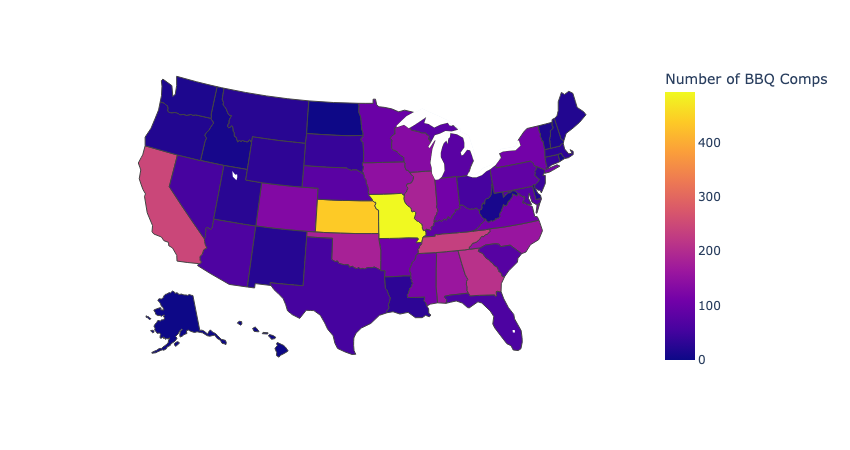

## Average KCBS Competition Location
> This takes all of the cities given in the dataset and converts them into coordinates and then reads through the list of latitude and longitude coordinates taking an average to find the average location of KCBS coordinates and plotting that on a map with Plotly

In [ ]:
# This set of code takes all the locations provided in the data set and uses nominatim and geopy to convert all of the locations is coordinates
'''
 from geopy.geocoders import Nominatim
 locations = set(dfComp['location'].tolist())
 with open("loglat.txt", mode = 'wt') as f:
     geolocator = Nominatim(user_agent="brett@balquist.com@PersonalProject")
     for location in locations:
         try:
             loc = geolocator.geocode(f"{location}")
             f.write(f"{loc.latitude, loc.longitude}\n")
         except:
             pass

'''

#This takes the document of coordinates and reads the document splitting it into latitude and longitude and then taking an average 
lat = []
longit = []
with open("loglat.txt", mode = 'r') as f:
    for line in f:
        clean_line = line.strip()[1:-2]
        loct = clean_line.split(", ")
        lat.append(float(loct[0]))
        longit.append(float(loct[1]))
avg_longit = (sum(longit)/len(longit))
avg_lat = (sum(lat)/len(lat))
print(f"Average BBQ Competition is located at: Latitude:{avg_lat} Longitude: {avg_longit}")

#This converts the average coordinates to a dataFrame and then uses Plotly Go to create a scatterplot graph that inludes a point of the average location.
coordinate = {'lat': [avg_lat], 'lon' : [avg_longit], 'text': ['Average location of KCBS BBQ Competition']}
df = pd.DataFrame(coordinate)
fig = go.Figure(data=go.Scattergeo(
        lon = coordinate['lon'],
        lat = coordinate['lat'],
        text = coordinate['text'],
        mode = 'markers',
        ))

# This sets the title of the map and the scope. Finally, shows the figure.
fig.update_layout(
        title = 'Average Location of a KCBS BBQ competition',
        geo_scope='usa',
    )
fig.show()

## Average KCBS Competition Location Based on Latitude and Longitude

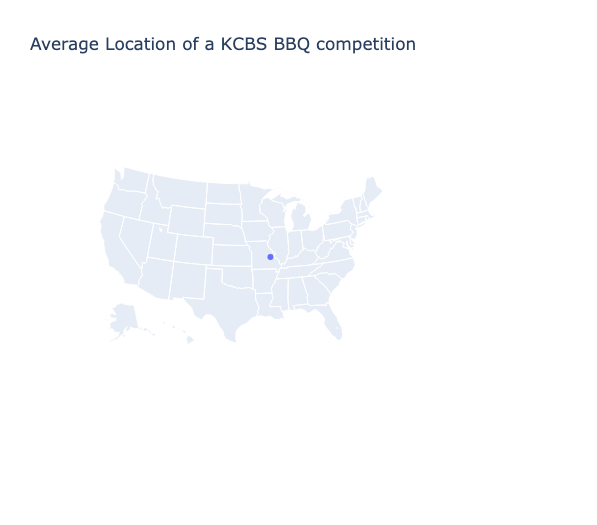

## Kansas KCBS Competition Months Bar Chart
> My dad would always compete in late september and early october and I would remember eating barbeque on chilly nights nad enjoyed watching him compete. I Wanted to see when a majority of Kansas' KCBS competitions were and used matplotlib to chart the data

<AxesSubplot: title={'center': 'Number of Competitions In Kansas Based on Month'}, xlabel='month'>

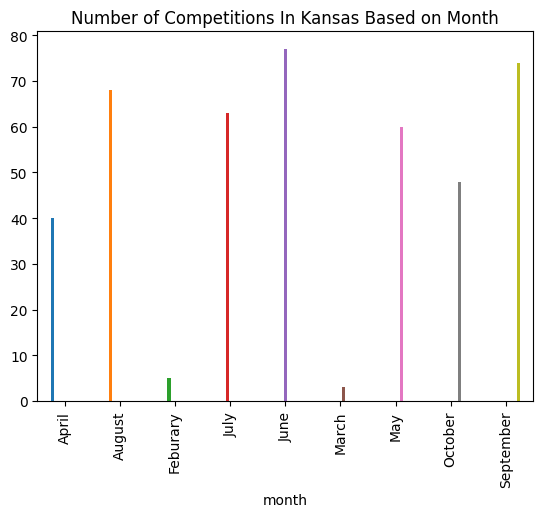

In [37]:
# Dictionary that converts the month numbers to English
monthConversion = {
    1: "January",
    2: "Feburary",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
# Copy of DataFrames to be modified and compiled into one containing states and months.
kcbsMonth = dfCompWP[['kcbs_competition_id', 'month']].copy()
kcbsState = dfComp[['kcbs_competition_id', 'state']].copy()
compiledComp = kcbsMonth.merge(kcbsState, how='right')
ccMonths = compiledComp.replace({"month": monthConversion})
# Drops compeition ID as it is unnesecary data.
ccMonths = ccMonths.drop('kcbs_competition_id', axis=1)
# Specifies the state to be Kansas
kansas = ccMonths.loc[ccMonths['state'] == 'KS', 'month']
#Creates individual bar graphs that show a commparison of the number of each occurence in Kansas
ccMonths = ccMonths.groupby([kansas, 'month']).size()
ccMonths = ccMonths.unstack()
ccMonths.plot(kind='bar', title='Number of Competitions In Kansas Based on Month',legend=False)


## Meat Scores Bar Chart Comparison
> My father would always cook sausage and I wanted to see how other meats scored. This uses matplotlib and pandas to analyze the dataset and generate a bar chart to compare outputs.

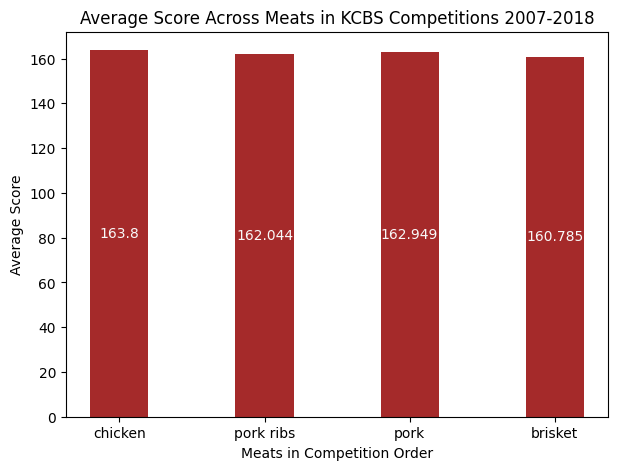

In [7]:
# This establishes the cetegories with 0 point placeholders to be used to make average.
categories = {
    'chicken': 0, 
    'pork ribs': 0, 
    'pork': 0, 
    'brisket': 0
}
# This finds a each score based on the category and adds it to the dictionary value pair.
for key,value in categories.items(): 
    meat = dfResults.loc[dfResults['category'] == key, 'score']
    Submits = len(meat)
    total = 0
    for score in meat:
        total += score
    averageScore = total/Submits
    categories[key] = averageScore
# This creates a list of the key value pairings.
meats = list(categories.keys())
scores =list(categories.values())
fig, ax = plt.subplots(figsize = (7,5))
#This generates the chart using matplotlib
b = ax.bar(meats, scores, color ='brown', width = 0.4)
ax.bar_label(b, label_type="center", color='#f9f9f9')
ax.set_xlabel("Meats in Competition Order")
ax.set_ylabel("Average Score")
ax.set_title("Average Score Across Meats in KCBS Competitions 2007-2018")
plt.show()